In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np 
from visibility_graph import visibility_graph
import networkx as nx
import statsmodels.api as sm
import os

ruta = '../HPM/'
title = 'HPM'


edge = '../HPM/edgeList/'

if not os.path.exists(ruta):
    os.makedirs(ruta)
    
if not os.path.exists(edge):
    os.makedirs(edge)

In [2]:
def lista0 (lista1, lista2):
    while 0 in lista1:
        lista2.pop(lista1.index(0))
        lista1.remove(0)
    return lista1, lista2 

def get_alpha(route,id, li_fit, ls_fit, xlimi, xlims, color, name):
    
    data = f'{route}{id}'
    routeSaved = f'{route}pdf_{title}/'

    if not os.path.exists(routeSaved):
        os.makedirs(routeSaved)

    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    # Plot degree distribution
    a=np.linspace(li_fit,ls_fit,10)
    

    plt.figure(figsize=(6,4))
    plt.plot(x0,y0,color=color,linewidth=0,marker="P",markersize=5,label="data")
    plt.plot(a,(a)*(model.params[1])+model.params[0]*1.,color="k",lw=3,label=r"fit ($\alpha_0={}$)".format(-np.round(model.params[1],2)))
    plt.xlabel(r'$\log_{10}(k)$ (Degree)'); plt.ylabel(r'$\log_{10} P(k)$'); plt.title('Degree Distribution {}'.format(name)); plt.legend(); plt.xlim(xlimi,xlims)
    plt.legend(title=r"$P(k)\sim x^{-\alpha_0}$"); plt.grid(alpha=0.5)
    plt.savefig(routeSaved+f'{id}.pdf',dpi=400,bbox_inches='tight')
    plt.show()

    return

In [3]:
hpm = pd.read_csv(f'../transients/{title}.csv')
hpm

,Classification,ID,observation_id,Mag,Magerr,MJD
0,HPM,1611071120084120846,28701,14.6499,0.056537,56184.413320
1,HPM,1611071120084120846,28730,14.6437,0.056402,56265.172227
2,HPM,1611071120084120846,28731,14.6457,0.056402,56265.177306
3,HPM,1611071120084120846,28732,14.6201,0.056305,56265.182403
4,HPM,1611071120084120846,28733,14.6193,0.055206,56273.092129
...,...,...,...,...,...,...
2035,HPM,1505111320544122430,420809,17.4903,0.093521,55959.308673
2036,HPM,1204011230584135800,214138,15.2372,0.060339,56463.177343
2037,HPM,1209171151174127289,372677,17.4482,0.096925,56462.416350
2038,HPM,1209171151174127289,372676,17.4216,0.096035,56462.411217


In [9]:
ids = list(hpm['ID'].unique())
print(len(list(hpm['ID'].unique())))
hpm['ID'].unique()


6


array([1611071120084120846, 1003161230594124017, 1505111320544122430,
       1011070010184229345, 1204011230584135800, 1209171151174127289],
      dtype=int64)

In [6]:
def get_alpha_data(route,id, li_fit, ls_fit, name):
    
    data = f'{edge}{id}'
    
    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    alpha = -np.round(model.params[1],2)
    values = [name,id,alpha]
    
    return values

In [7]:
values = []
for id in ids:
    values.append(get_alpha_data(edge, id, 0.767, 1.406, 'HPM')) 

print(values)

[['HPM', 1611071120084120846, 2.49], ['HPM', 1003161230594124017, 2.59], ['HPM', 1505111320544122430, 2.37], ['HPM', 1011070010184229345, 2.51], ['HPM', 1204011230584135800, 1.99], ['HPM', 1209171151174127289, 2.7]]


In [8]:
import csv 

ruta = '../resultados/prueba.csv'

with open (ruta, mode = 'a', newline = '') as archivo: 
    writer = csv.writer(archivo)

    writer.writerows(values)
    pass

##### Función para hacer los datos

In [5]:
#funcion que haga eso de forma automatica

def edgelist(id):

    vec_id = hpm[hpm['ID'] == id]['Mag']
    graph_id = visibility_graph(vec_id)
    nx.write_edgelist(graph_id, f'{ruta}edgeList/{id}')


In [7]:
values_min = [0.72, 0.8, 0.71, 0.83, 0.73, 0.815]
values_max = [1.40, 1.5, 1.39, 1.36, 1.40, 1.385]
values_alpha = [2.51, 2.13, 2.49, 2.78, 2.37, 2.7]

#### Indices de los id's a probar (sacado aleatoreamente)

id1 = 3

id2 = 4

id2 = 0

id2 = 5

id2 = 2

In [8]:
id1 = 1011070010184229345
id2 = 1204011230584135800
id3 = 1611071120084120846
id4 = 1209171151174127289
id5 = 1505111320544122430
id6 = 1003161230594124017


edgelist(id1)
edgelist(id2)
edgelist(id3)
edgelist(id4)
edgelist(id5)
edgelist(id6)

#### PRUEBA 1 $\rightarrow$ HPM 

ID: 1011070010184229345

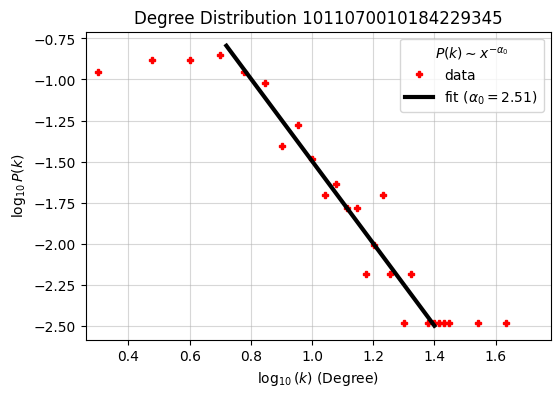

In [9]:
#0.85 & 1.34 -> 3.0
#otra opcion: 0.65  & 1.43 -> 2.32 [posible ganadora]
#otra (no creo tanto): 0.72 & 1.42 -> 2.4

get_alpha(ruta, id1, 0.72,1.40,0.26,1.78, "red", id1)


#### PRUEBA 2 $\rightarrow$ HPM

ID: 1204011230584135800

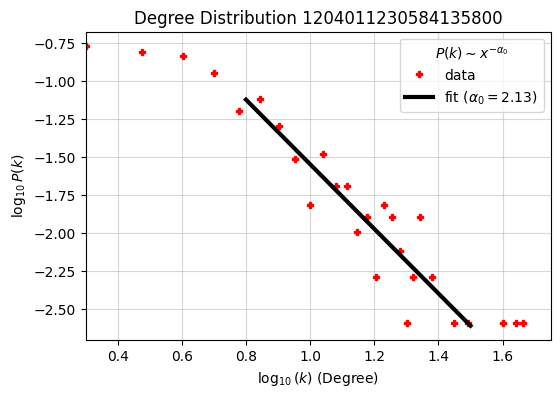

In [10]:
#0.85 & 1.34 -> 1.58
#otra opcion: 0.65  & 1.398 -> 2.19 [posible ganadora]
#otra: 0.695 & 1.398 -> 2.19 [mismo pero mejor]

get_alpha(ruta,id2,0.8,1.5,0.3,1.75, "red", id2)

#### PRUEBA 3 $\rightarrow$ HPM

ID: 1611071120084120846

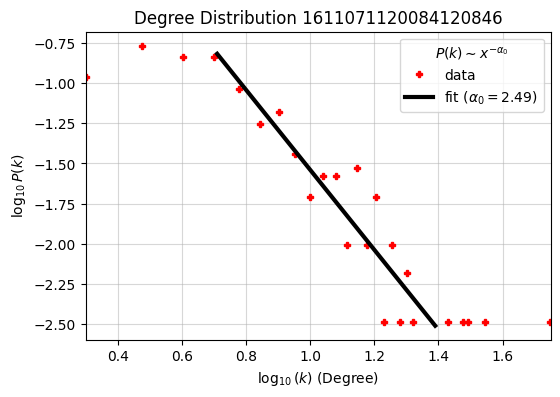

In [11]:


get_alpha(ruta,id3,0.71,1.39,0.3,1.75, "red", id3)

#### PRUEBA 4 $\rightarrow$ HPM

ID: 1209171151174127289

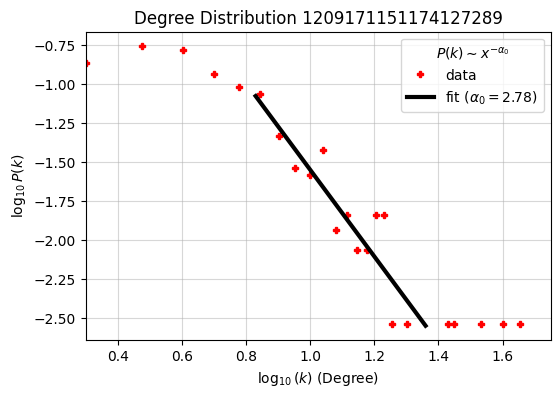

In [12]:

#dudo un poco 

get_alpha(ruta,id4,0.83,1.36,0.3,1.75, "red", id4)

#### PRUEBA 5 $\rightarrow$ HPM

ID: 1505111320544122430

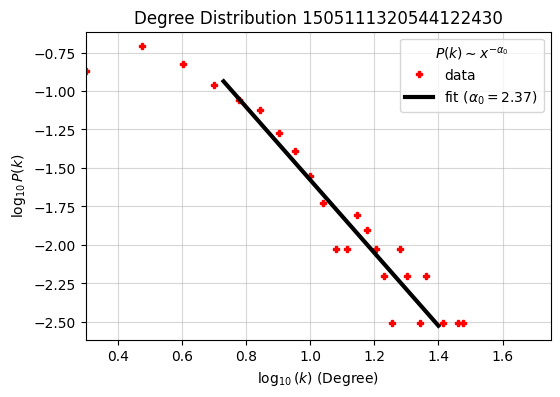

In [13]:


get_alpha(ruta,id5,0.73,1.40,0.3,1.75, "red", id5)

<!-- #### PRUEBA 6 $\rightarrow$ HPM -->

ID: 1003161230594124017

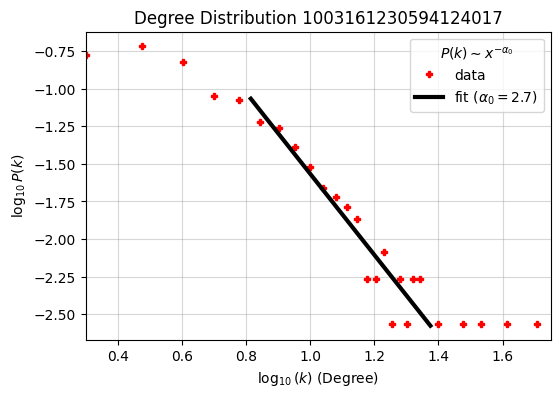

In [14]:


get_alpha(ruta,id6,0.815,1.375,0.3,1.75, "red", id6)